# Task 7: Stock Market Prediction using Numerical and Textual analysis
## <blockquote>Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines.</blockquote>
### Author: Marisha Bhatti
<br>
<br>

  - <b>Step 1:</b> Import all required libraries.

In [1]:
import pandas as pd                  #for data wrangling and data manipulation
import numpy as np                   #for numerical and scientific computing
import matplotlib.pyplot as plt      #for data visualization and graphical plotting
import seaborn as sns                #for data visualization, built on matplotlib

## Import Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

## Import Text Analysis Libraries
# !pip install textblob 
# !pip install twython  #incase they need to be installed
from textblob import TextBlob
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/marisha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/marisha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/marisha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/marisha/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

 - <b>Step 2:</b> Import and visualise the SENSEX dataset for numerical analysis

Download historical stock prices from finance.yahoo.com or use SENSEX.csv file in the repository

In [2]:
# Loading the SENSEX dataset
df1 = pd.read_csv("https://raw.githubusercontent.com/Marisha18/GRIP-Tasks/main/SENSEX.csv")
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,483.549988,483.549988,461.380005,462.489990,462.489990,1129400000
1,2001-01-03,462.489990,484.390015,459.279999,484.390015,484.390015,188070000
2,2001-01-04,484.390015,484.390015,475.899994,477.200012,477.200012,216940000
3,2001-01-05,477.200012,477.309998,461.760010,463.140015,463.140015,1430800000
4,2001-01-08,463.140015,463.140015,457.559998,461.640015,461.640015,1115500000


In [3]:
df1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2524,2011-01-14,800.650024,807.890015,799.049988,807.570007,807.570007,4661590000
2525,2011-01-18,807.570007,807.659973,801.039978,807.559998,807.559998,5284990000
2526,2011-01-19,806.679993,807.210022,785.849976,786.890015,786.890015,4743710000
2527,2011-01-20,781.960022,785.780029,775.580017,778.080017,778.080017,4935320000
2528,2011-01-21,781.960022,786.890015,773.119995,773.179993,773.179993,4935320000


Length of dataset: 2529
<br>Last date: 21/01/2011 (DD/MM/YYYY)

<AxesSubplot:>

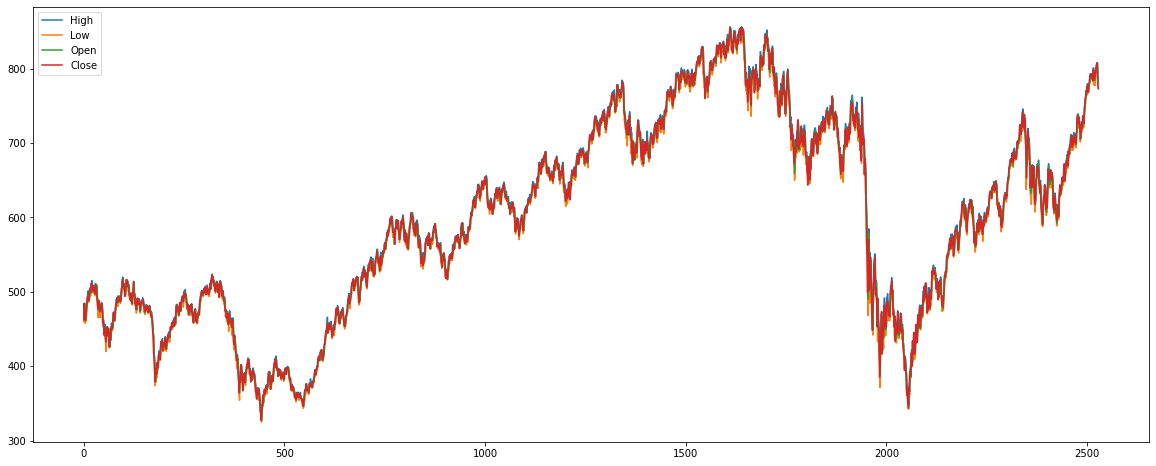

In [4]:
# Visualise the SENSEX dataset
df1[['High','Low','Open','Close']].plot(figsize=(20,8))

<AxesSubplot:>

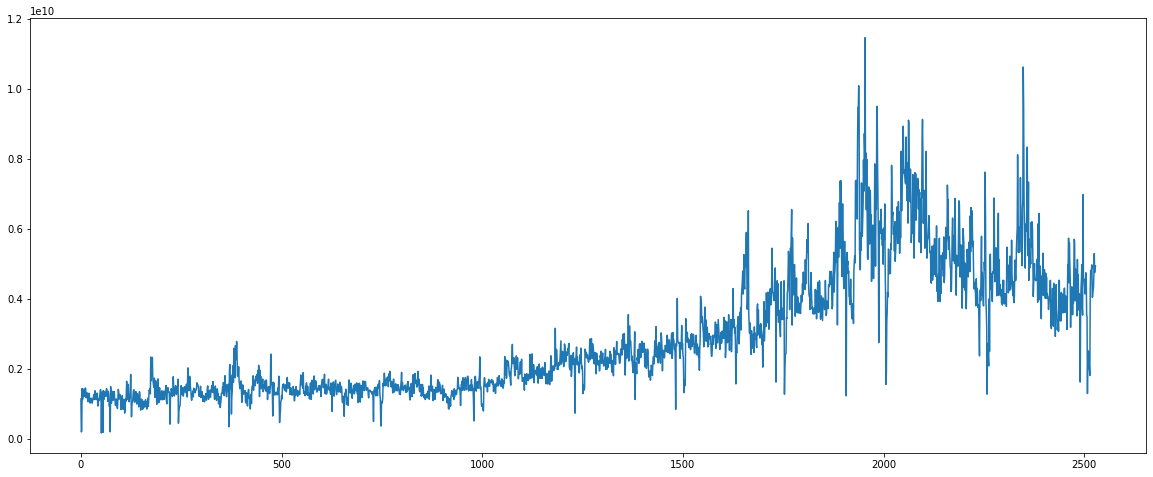

In [5]:
df1['Volume'].plot(figsize=(20,8))

In stock trading, the high and low refer to the maximum and minimum prices in a given time period. Open and close are the prices at which a stock began and ended trading in the same period. Volume is the total amount of trading activity. Adjusted values factor in corporate actions such as dividends, stock splits, and new share issuance.

 - <b>Step 3:</b> Pre-Process the SENSEX dataset

In [6]:
# Making sure df1 and df2 datasets match w.r.t Date 
df1=df1[df1['Date']<='2011-01-21']
df1['Date']=pd.to_datetime(df1['Date']) 
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,483.549988,483.549988,461.380005,462.489990,462.489990,1129400000
1,2001-01-03,462.489990,484.390015,459.279999,484.390015,484.390015,188070000
2,2001-01-04,484.390015,484.390015,475.899994,477.200012,477.200012,216940000
3,2001-01-05,477.200012,477.309998,461.760010,463.140015,463.140015,1430800000
4,2001-01-08,463.140015,463.140015,457.559998,461.640015,461.640015,1115500000


In [7]:
df1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2524,2011-01-14,800.650024,807.890015,799.049988,807.570007,807.570007,4661590000
2525,2011-01-18,807.570007,807.659973,801.039978,807.559998,807.559998,5284990000
2526,2011-01-19,806.679993,807.210022,785.849976,786.890015,786.890015,4743710000
2527,2011-01-20,781.960022,785.780029,775.580017,778.080017,778.080017,4935320000
2528,2011-01-21,781.960022,786.890015,773.119995,773.179993,773.179993,4935320000


 - <b>Step 4:</b> Import and visualise the News Headline dataset for textual analysis

Download textual (news) data from https://bit.ly/36fFPI6 or https://www.kaggle.com/therohk/india-headlines-news-dataset?select=india-news-headlines.csv

In [8]:
# Loading the News Headline dataset
df2 = pd.read_csv("/home/marisha/Downloads/india-news-headlines.csv")
df2.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [9]:
df2.tail()

,publish_date,headline_category,headline_text
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...
3424066,20201231,entertainment.bengali.movies.news,Celebs plan to party safely and responsibly on...


Length of dataset: 3424067
<br>Last date: 31/12/2020 (DD/MM/YYYY)
<br>
<br>df2 needs to be compressed to match df1 along with other preprocessing.

 - <b>Step 5:</b> Pre-Process the News Headline dataset

In [10]:
df2['publish_date']=pd.to_datetime(df2['publish_date'],format='%Y%m%d') # Change data to the same format as df1
df2=df2.drop('headline_category',axis=1) # Dropping feature 'headline_category' as it barely affects results
df2.head()

,publish_date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic


In [11]:
# Compressing df2 to match df1
df2=df2[df2['publish_date']<='2011-01-21']
df2['publish_date']=pd.to_datetime(df2['publish_date']) 
df2.head()

,publish_date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic


In [12]:
df2.tail() # Checking the dates

,publish_date,headline_text
1047556,2011-01-21,Protest against Omar's remarks
1047557,2011-01-21,PAU students continue agitation
1047558,2011-01-21,Self-employment Day marked
1047559,2011-01-21,Govt school lecturers negligent: monitoring te...
1047560,2011-01-21,1;303 nominations received for Padma Awards 2011


In [13]:
df2=df2.rename(columns={'publish_date':'Date'}) # Matching the heading for date column in df1 and df2

# Cleaning the data
df2['headline_text']=df2.groupby(['Date']).transform(lambda x: ' '.join(x))
df2=df2.drop_duplicates()
df2.duplicated().sum()
df2.reset_index()

,index,Date,headline_text
0,0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,86,2001-01-03,Powerless north India gropes in the dark Think...
2,127,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,280,2001-01-05,Light combat craft takes India into club class...
4,406,2001-01-06,Light combat craft takes India into club class...
...,...,...,...
3625,1044084,2011-01-17,Older brother in the dark about sibling's deat...
3626,1044772,2011-01-18,Top sex mistakes men make No alcohol for 6-pac...
3627,1045470,2011-01-19,My ex doesn't want me: Pratik Saali is not a g...
3628,1046166,2011-01-20,Neetu Chandra denies going panty-less! Aishwar...


 - <b>Step 6:</b> Basic Text Analysis On News Headlines

1. Number of words in each row

In [14]:
df2['word_count'] = df2['headline_text'].apply(lambda x: len(str(x).split(" ")))
df2[['headline_text','word_count']].head()

,headline_text,word_count
0,Status quo will not be disturbed at Ayodhya; s...,550
86,Powerless north India gropes in the dark Think...,245
127,The string that pulled Stephen Hawking to Indi...,937
280,Light combat craft takes India into club class...,823
406,Light combat craft takes India into club class...,70


2. Number of Characters in every Statement from each row

In [15]:
df2['char_count'] = df2['headline_text'].str.len()
df2[['headline_text','char_count']].head()

,headline_text,char_count
0,Status quo will not be disturbed at Ayodhya; s...,3323
86,Powerless north India gropes in the dark Think...,1441
127,The string that pulled Stephen Hawking to Indi...,5855
280,Light combat craft takes India into club class...,5011
406,Light combat craft takes India into club class...,485


3. Calculate average word length

In [16]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df2['avg_word'] = df2['headline_text'].apply(lambda x: avg_word(x))
df2[['headline_text','avg_word']].head()

,headline_text,avg_word
0,Status quo will not be disturbed at Ayodhya; s...,5.043636
86,Powerless north India gropes in the dark Think...,4.885714
127,The string that pulled Stephen Hawking to Indi...,5.249733
280,Light combat craft takes India into club class...,5.089915
406,Light combat craft takes India into club class...,5.942857


4. Calculate the number of Stopwords

In [17]:
stop = stopwords.words('english')

df2['stopwords'] = df2['headline_text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df2[['headline_text','stopwords']].head()

,headline_text,stopwords
0,Status quo will not be disturbed at Ayodhya; s...,142
86,Powerless north India gropes in the dark Think...,56
127,The string that pulled Stephen Hawking to Indi...,191
280,Light combat craft takes India into club class...,164
406,Light combat craft takes India into club class...,7


5. Number of Special Characters in each Statement

In [18]:
df2['hashtags'] = df2['headline_text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df2[['headline_text','hashtags']].head()

,headline_text,hashtags
0,Status quo will not be disturbed at Ayodhya; s...,0
86,Powerless north India gropes in the dark Think...,0
127,The string that pulled Stephen Hawking to Indi...,0
280,Light combat craft takes India into club class...,0
406,Light combat craft takes India into club class...,0


6. Number of Numerics in each Statement

In [19]:
df2['numerics'] = df2['headline_text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df2[['headline_text','numerics']].head()

,headline_text,numerics
0,Status quo will not be disturbed at Ayodhya; s...,6
86,Powerless north India gropes in the dark Think...,6
127,The string that pulled Stephen Hawking to Indi...,4
280,Light combat craft takes India into club class...,13
406,Light combat craft takes India into club class...,1


7. Number of Uppercase Words in each Headline from each row

In [20]:
df2['upper'] = df2['headline_text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df2[['headline_text','upper']].head()

,headline_text,upper
0,Status quo will not be disturbed at Ayodhya; s...,17
86,Powerless north India gropes in the dark Think...,6
127,The string that pulled Stephen Hawking to Indi...,34
280,Light combat craft takes India into club class...,40
406,Light combat craft takes India into club class...,1


 - <b>Step 7:</b> Pre-Process the Data

1. Convert every word in the column to Lower Case

In [21]:
df2['headline_text'] = df2['headline_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df2['headline_text'].head()

0      status quo will not be disturbed at ayodhya; s...
86     powerless north india gropes in the dark think...
127    the string that pulled stephen hawking to indi...
280    light combat craft takes india into club class...
406    light combat craft takes india into club class...
Name: headline_text, dtype: object

2. Remove Punctuations

In [22]:
df2['headline_text'] = df2['headline_text'].str.replace('[^\w\s]','')
df2['headline_text'].head()

0      status quo will not be disturbed at ayodhya sa...
86     powerless north india gropes in the dark think...
127    the string that pulled stephen hawking to indi...
280    light combat craft takes india into club class...
406    light combat craft takes india into club class...
Name: headline_text, dtype: object

3. Remove the Stopwords

In [23]:
stop = stopwords.words('english')
df2['headline_text'] = df2['headline_text'].apply(
    lambda x: " ".join(x for x in x.split() if x not in stop))
df2['headline_text'].head()

0      status quo disturbed ayodhya says vajpayee fis...
86     powerless north india gropes dark think laxman...
127    string pulled stephen hawking india vajpayee g...
280    light combat craft takes india club class hawk...
406    light combat craft takes india club class hawk...
Name: headline_text, dtype: object

4. Remove Common Words

In [24]:
freq = pd.Series(' '.join(df2['headline_text']).split()).value_counts()[:10]
freq

india     28439
govt      23715
new       20015
rs        16061
city      15464
may       14980
case      14674
police    14149
us        13564
held      13463
dtype: int64

In [25]:
freq = list(freq.index)
df2['headline_text'] = df2['headline_text'].apply(
    lambda x: " ".join(x for x in x.split() if x not in freq))
df2['headline_text'].head()

0      status quo disturbed ayodhya says vajpayee fis...
86     powerless north gropes dark think laxman tells...
127    string pulled stephen hawking vajpayee gives b...
280    light combat craft takes club class hawkings d...
406    light combat craft takes club class hawkings d...
Name: headline_text, dtype: object

5. Remove Rare Words to Get Rid of Noise

In [26]:
freq = pd.Series(' '.join(df2['headline_text']).split()).value_counts()[-10:]
freq

kullus         1
adig           1
dwaram         1
fagan          1
sunderkanto    1
generously     1
mppdp          1
flied          1
paanchre1      1
ngpmum         1
dtype: int64

In [27]:
freq = list(freq.index)
df2['headline_text'] = df2['headline_text'].apply(
    lambda x: " ".join(x for x in x.split() if x not in freq))
df2['headline_text'].head()

0      status quo disturbed ayodhya says vajpayee fis...
86     powerless north gropes dark think laxman tells...
127    string pulled stephen hawking vajpayee gives b...
280    light combat craft takes club class hawkings d...
406    light combat craft takes club class hawkings d...
Name: headline_text, dtype: object

In [28]:
df2.shape

(3630, 9)

6. Tokenization

In [29]:
TextBlob(str(df2['headline_text'])).words

WordList(['0', 'status', 'quo', 'disturbed', 'ayodhya', 'says', 'vajpayee', 'fis', '86', 'powerless', 'north', 'gropes', 'dark', 'think', 'laxman', 'tells', '127', 'string', 'pulled', 'stephen', 'hawking', 'vajpayee', 'gives', 'b', '280', 'light', 'combat', 'craft', 'takes', 'club', 'class', 'hawkings', 'd', '406', 'light', 'combat', 'craft', 'takes', 'club', 'class', 'hawkings', 'd', '1044084', 'older', 'brother', 'dark', 'siblings', 'death', 'thought', 'supe', '1044772', 'top', 'sex', 'mistakes', 'men', 'make', 'alcohol', '6pack', 'salman', '1045470', 'ex', 'doesnt', 'want', 'pratik', 'saali', 'gaali', 'sudhir', 'tells', '1046166', 'neetu', 'chandra', 'denies', 'going', 'pantyless', 'aishwarya', '1046864', 'giving', 'kids', 'dressing', 'ak', 'hangals', 'ill', 'broke', 'dhob', 'Name', 'headline_text', 'Length', '3630', 'dtype', 'object'])

7. Stemming

In [30]:
st = PorterStemmer()
df2['headline_text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()])).head()

0      statu quo disturb ayodhya say vajpaye fissur h...
86     powerless north grope dark think laxman tell s...
127    string pull stephen hawk vajpaye give big push...
280    light combat craft take club class hawk day li...
406    light combat craft take club class hawk day ex...
Name: headline_text, dtype: object

8. Perform SENTIMENTAL ANALYSIS for each row in a Headline_text Column

In [31]:
df2['sentiment'] = df2['headline_text'].apply(lambda x: TextBlob(x).sentiment[0] )
df2[['headline_text','sentiment']].head()

,headline_text,sentiment
0,status quo disturbed ayodhya says vajpayee fis...,0.121014
86,powerless north gropes dark think laxman tells...,0.112500
127,string pulled stephen hawking vajpayee gives b...,0.049416
280,light combat craft takes club class hawkings d...,0.271341
406,light combat craft takes club class hawkings d...,0.262500


9. Reset Index

In [32]:
data2=df2[['Date','headline_text','sentiment']].reset_index()
data2=data2.drop('index',axis=1)
data2

,Date,headline_text,sentiment
0,2001-01-02,status quo disturbed ayodhya says vajpayee fis...,0.121014
1,2001-01-03,powerless north gropes dark think laxman tells...,0.112500
2,2001-01-04,string pulled stephen hawking vajpayee gives b...,0.049416
3,2001-01-05,light combat craft takes club class hawkings d...,0.271341
4,2001-01-06,light combat craft takes club class hawkings d...,0.262500
...,...,...,...
3625,2011-01-17,older brother dark siblings death thought supe...,0.040018
3626,2011-01-18,top sex mistakes men make alcohol 6pack salman...,0.028897
3627,2011-01-19,ex doesnt want pratik saali gaali sudhir tells...,0.055350
3628,2011-01-20,neetu chandra denies going pantyless aishwarya...,0.035866


 - <b>Step 8:</b> Analyze Our SENSEX Data

In [33]:
data1=df1[(df1['Date']>='2001-01-02')&(df1['Date']<='2011-01-21')]
data1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,483.549988,483.549988,461.380005,462.489990,462.489990,1129400000
1,2001-01-03,462.489990,484.390015,459.279999,484.390015,484.390015,188070000
2,2001-01-04,484.390015,484.390015,475.899994,477.200012,477.200012,216940000
3,2001-01-05,477.200012,477.309998,461.760010,463.140015,463.140015,1430800000
4,2001-01-08,463.140015,463.140015,457.559998,461.640015,461.640015,1115500000
...,...,...,...,...,...,...,...
2524,2011-01-14,800.650024,807.890015,799.049988,807.570007,807.570007,4661590000
2525,2011-01-18,807.570007,807.659973,801.039978,807.559998,807.559998,5284990000
2526,2011-01-19,806.679993,807.210022,785.849976,786.890015,786.890015,4743710000
2527,2011-01-20,781.960022,785.780029,775.580017,778.080017,778.080017,4935320000


<AxesSubplot:>

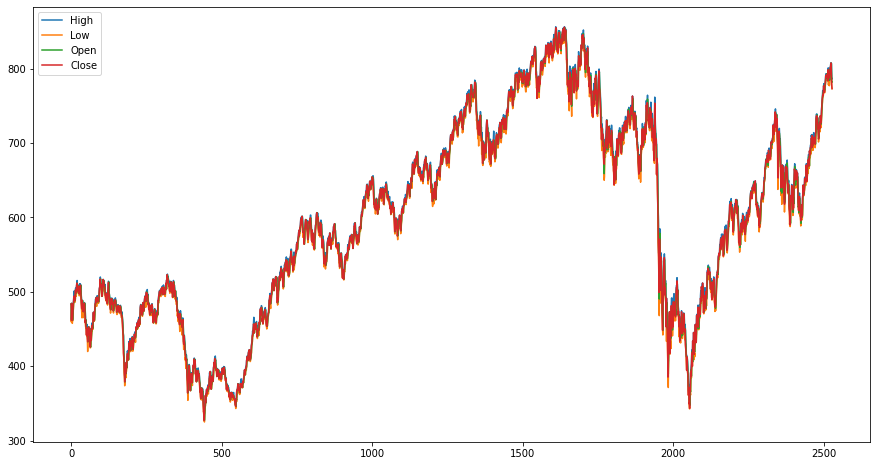

In [34]:
# Visualise the modified dataset
data1[['High','Low','Open','Close']].plot(figsize=(15,8))

<AxesSubplot:>

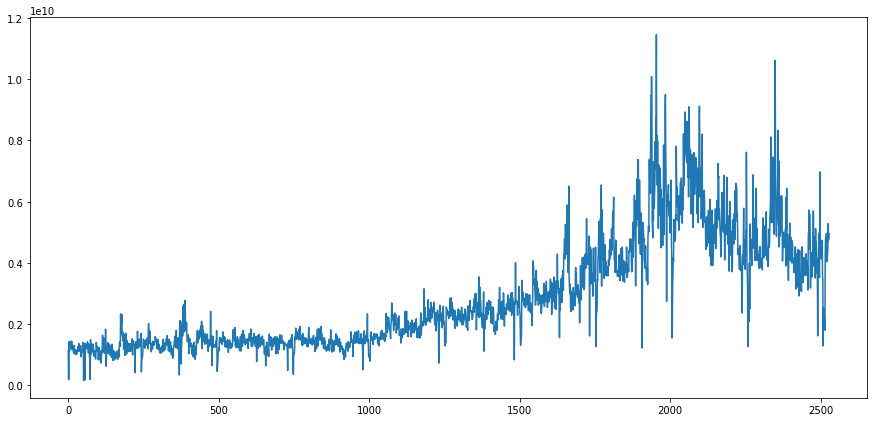

In [35]:
data1['Volume'].plot(figsize=(15,7))

 - <b>Step 9:</b> Merge Sensex and Headlines Dataset to create a HYBRID MODEL

In [36]:
Data=pd.merge(data2,data1,on='Date',how='right')
Data

,Date,headline_text,sentiment,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,status quo disturbed ayodhya says vajpayee fis...,0.121014,483.549988,483.549988,461.380005,462.489990,462.489990,1129400000
1,2001-01-03,powerless north gropes dark think laxman tells...,0.112500,462.489990,484.390015,459.279999,484.390015,484.390015,188070000
2,2001-01-04,string pulled stephen hawking vajpayee gives b...,0.049416,484.390015,484.390015,475.899994,477.200012,477.200012,216940000
3,2001-01-05,light combat craft takes club class hawkings d...,0.271341,477.200012,477.309998,461.760010,463.140015,463.140015,1430800000
4,2001-01-08,sangh parivar babri panel ante frontrunner key...,-0.056988,463.140015,463.140015,457.559998,461.640015,461.640015,1115500000
...,...,...,...,...,...,...,...,...,...
2524,2011-01-14,cartoons yamla pagla deewana movie review srk ...,0.068394,800.650024,807.890015,799.049988,807.570007,807.570007,4661590000
2525,2011-01-18,top sex mistakes men make alcohol 6pack salman...,0.028897,807.570007,807.659973,801.039978,807.559998,807.559998,5284990000
2526,2011-01-19,ex doesnt want pratik saali gaali sudhir tells...,0.055350,806.679993,807.210022,785.849976,786.890015,786.890015,4743710000
2527,2011-01-20,neetu chandra denies going pantyless aishwarya...,0.035866,781.960022,785.780029,775.580017,778.080017,778.080017,4935320000


In [37]:
# Removing Duplicates
Data=Data.drop_duplicates()
Data.duplicated().sum()

0

 - <b>Step 10:</b> Sentimental Analysis On News Headlines

In [38]:
# Sentimental Analysis
analyzer = SentimentIntensityAnalyzer()
Data['scores'] = Data['headline_text'].apply(lambda x: analyzer.polarity_scores(str(x)))
print(Data.head())

# Scoring the Sentiments
Data['compound']=Data['scores'].apply(lambda score_dict: score_dict['compound']) 
Data['positive']=Data['scores'].apply(lambda score_dict: score_dict['pos'])
Data['negative']=Data['scores'].apply(lambda score_dict: score_dict['neg']) 
Data['neutral']=Data['scores'].apply(lambda score_dict: score_dict['neu'])

# Replacing scores column with positive, negative and neutral columns
Data=Data.drop('scores',axis=1)
Data

        Date                                      headline_text  sentiment  \
0 2001-01-02  status quo disturbed ayodhya says vajpayee fis...   0.121014   
1 2001-01-03  powerless north gropes dark think laxman tells...   0.112500   
2 2001-01-04  string pulled stephen hawking vajpayee gives b...   0.049416   
3 2001-01-05  light combat craft takes club class hawkings d...   0.271341   
4 2001-01-08  sangh parivar babri panel ante frontrunner key...  -0.056988   

         Open        High         Low       Close   Adj Close      Volume  \
0  483.549988  483.549988  461.380005  462.489990  462.489990  1129400000   
1  462.489990  484.390015  459.279999  484.390015  484.390015   188070000   
2  484.390015  484.390015  475.899994  477.200012  477.200012   216940000   
3  477.200012  477.309998  461.760010  463.140015  463.140015  1430800000   
4  463.140015  463.140015  457.559998  461.640015  461.640015  1115500000   

                                              scores  
0  {'neg': 0.

,Date,headline_text,sentiment,Open,High,Low,Close,Adj Close,Volume,compound,positive,negative,neutral
0,2001-01-02,status quo disturbed ayodhya says vajpayee fis...,0.121014,483.549988,483.549988,461.380005,462.489990,462.489990,1129400000,-0.9662,0.105,0.170,0.726
1,2001-01-03,powerless north gropes dark think laxman tells...,0.112500,462.489990,484.390015,459.279999,484.390015,484.390015,188070000,0.4019,0.149,0.141,0.711
2,2001-01-04,string pulled stephen hawking vajpayee gives b...,0.049416,484.390015,484.390015,475.899994,477.200012,477.200012,216940000,0.5423,0.126,0.126,0.748
3,2001-01-05,light combat craft takes club class hawkings d...,0.271341,477.200012,477.309998,461.760010,463.140015,463.140015,1430800000,0.9841,0.193,0.147,0.660
4,2001-01-08,sangh parivar babri panel ante frontrunner key...,-0.056988,463.140015,463.140015,457.559998,461.640015,461.640015,1115500000,-0.9709,0.092,0.155,0.753
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2524,2011-01-14,cartoons yamla pagla deewana movie review srk ...,0.068394,800.650024,807.890015,799.049988,807.570007,807.570007,4661590000,-0.9998,0.108,0.168,0.725
2525,2011-01-18,top sex mistakes men make alcohol 6pack salman...,0.028897,807.570007,807.659973,801.039978,807.559998,807.559998,5284990000,-0.9998,0.102,0.162,0.736
2526,2011-01-19,ex doesnt want pratik saali gaali sudhir tells...,0.055350,806.679993,807.210022,785.849976,786.890015,786.890015,4743710000,-0.9997,0.095,0.151,0.755
2527,2011-01-20,neetu chandra denies going pantyless aishwarya...,0.035866,781.960022,785.780029,775.580017,778.080017,778.080017,4935320000,-0.9998,0.107,0.164,0.728


 - <b>Step 11:</b> Stock Market Analysis
<blockquote>Creating a new Column called 'Price_up' by having logical values(0 AND 1) in it. Here 1 represents INCREASE IN STOCK while 0 represents DECREASE/REMAIN UNCHANGED</blockquote>

In [39]:
Data['Price_up']=np.where(Data['Close'].shift(-1)>Data['Close'],1,0)
Data.head()

,Date,headline_text,sentiment,Open,High,Low,Close,Adj Close,Volume,compound,positive,negative,neutral,Price_up
0,2001-01-02,status quo disturbed ayodhya says vajpayee fis...,0.121014,483.549988,483.549988,461.380005,462.489990,462.489990,1129400000,-0.9662,0.105,0.170,0.726,1
1,2001-01-03,powerless north gropes dark think laxman tells...,0.112500,462.489990,484.390015,459.279999,484.390015,484.390015,188070000,0.4019,0.149,0.141,0.711,0
2,2001-01-04,string pulled stephen hawking vajpayee gives b...,0.049416,484.390015,484.390015,475.899994,477.200012,477.200012,216940000,0.5423,0.126,0.126,0.748,0
3,2001-01-05,light combat craft takes club class hawkings d...,0.271341,477.200012,477.309998,461.760010,463.140015,463.140015,1430800000,0.9841,0.193,0.147,0.660,0
4,2001-01-08,sangh parivar babri panel ante frontrunner key...,-0.056988,463.140015,463.140015,457.559998,461.640015,461.640015,1115500000,-0.9709,0.092,0.155,0.753,1


 - <b>Step 12:</b> Split the Dataset

In [40]:
# Splitting Dataset into X and Y
X=Data[['sentiment', 'Open', 'High', 'Low','Close',
          'Volume', 'compound', 'positive', 'negative', 'neutral']]
y=Data['Price_up']

# Splitting Dataset into train and test set
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=0)

print(train_X.shape)
print(val_X.shape)

(2023, 10)
(506, 10)


Here, the length of testing data is 506 which is 20% of 2529 (length of original dataset). The general split ratio has been taken into consideration, but it can be changed using the test_size attribute to train_test_split function.

 - <b>Step 13:</b> Search Optimal Parameters

In [41]:
# The fillna() function is used to fill NA/NaN values
train_X = train_X.fillna(train_X.mean())

In [42]:
# Grid search for Optimal Parameters using Random Forest Classifier
tuned_parameters=[{'max_depth':[10,20], 'n_estimators':[10,20], 'max_features':['sqrt',0.2]}]
radm_clf=RandomForestClassifier()
clf=GridSearchCV(radm_clf, tuned_parameters,cv=5,scoring='roc_auc')
clf.fit(train_X,train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 20], 'max_features': ['sqrt', 0.2],
                          'n_estimators': [10, 20]}],
             scoring='roc_auc')

In [43]:
# Best Score
clf.best_score_

0.524099886093508

In [44]:
# Best Parameters
clf.best_params_

{'max_depth': 20, 'max_features': 0.2, 'n_estimators': 20}

 - <b>Step 14:</b>  Build and Train the Model

In [45]:
randomclassifier=RandomForestClassifier(n_estimators=20,max_features='sqrt')
randomclassifier.fit(train_X,train_y) # Train the model

print("Training complete.")

Training complete.


 - <b>Step 15:</b> Model Evaluation

TN / True Negative: when a case was negative and predicted negative.
<br>TP / True Positive: when a case was positive and predicted positive.
<br>FN / False Negative: when a case was positive but predicted negative.
<br>FP / False Positive: when a case was negative but predicted positive.
<br>
<br><i>Accuracy:</i> Accuracy is simply the rate of correct classifications. It is the true positives and negatives to all predictions.
<br><i>Precision:</i> Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.
<br><i>Recall:</i> Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.
<br><i>F1-Score:</i> The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
<br><i>Support:</i> The support is the number of samples of the true response that lie in that class.

In [46]:
# Classification Report
val_X = val_X.fillna(val_X.mean())
pred_y=randomclassifier.predict(val_X)

print(metrics.classification_report(val_y,pred_y))

              precision    recall  f1-score   support

           0       0.49      0.54      0.52       251
           1       0.50      0.46      0.48       255

    accuracy                           0.50       506
   macro avg       0.50      0.50      0.50       506
weighted avg       0.50      0.50      0.50       506



Mean Absolute Error: Absolute error refers to the magnitude of difference between the prediction of an observation and the true value of that observation.
<br>Mean Squared Error: It is the sum, over all the data points, of the square of the difference between the predicted and actual target variables, divided by the number of data points.
<br>Root Mean Squared Error: It is the square root of Mean Squared Error.
<br>R2 Score: coefficient of determination; (total variance explained by model) / (total variance); The value ranges from 0 to 1 and should ideally be close to 1.

In [47]:
# Errors
print('Mean Absolute Error:', metrics.mean_absolute_error(val_y,pred_y))
print('Mean Squared Error:', metrics.mean_squared_error(val_y,pred_y))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(val_y,pred_y)))
print('R2 Score:', -metrics.r2_score(val_y, pred_y))

Mean Absolute Error: 0.5019762845849802
Mean Squared Error: 0.5019762845849802
Root Mean Squared Error: 0.7085028472666713
R2 Score: 1.0080306226076092


# <b>_____________</b>